# Navigation MDP [1]

In [1]:
import numpy as np
from simple_rl.tasks import NavigationMDP
from simple_rl.agents import QLearningAgent
from simple_rl.planning import ValueIteration
from simple_rl.tasks.grid_world.GridWorldStateClass import GridWorldState

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(0)
nvmdp = NavigationMDP(width=30, 
                        height=30, 
                        goal_locs=[(21,21)], 
                        init_loc=(10,10),
                        rand_init=True,
                        cell_types=['white', 'yellow', 'red', 'lime', 'magenta'],
                        cell_type_rewards=[0, 0, -10, -10, -10],
                        cell_distribution="probability",
                        cell_type_probs=[0.68, 0.17, 0.05, 0.05, 0.05],
                        goal_rewards=[1.],
                        goal_colors=["blue"],
                        slip_prob=0.00,
                        step_cost=0.0,
                        gamma=.99)

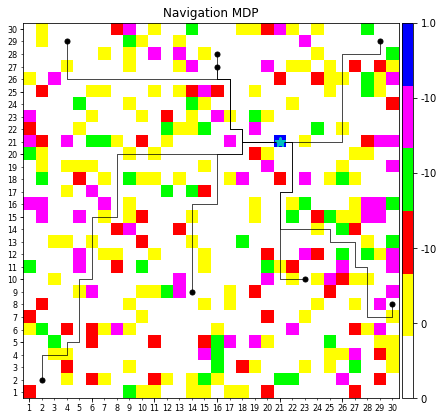

In [3]:
N_tau = 8
# Use "init_states" to request specific init states while sampling trajectories
# if "n_trajectory" is greater than # of init_states, remaining init states will be sampled randomly
state_trajectories, action_trajectories = nvmdp.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(2,2)], init_repetition=False)
nvmdp.visualize_grid(trajectories=state_trajectories, show_rewards_cbar=True)

## Features used for short horizon

In [4]:
print("Sample State Trajectory (Features: [Cell Indicator, Cell Distsance, Goal] ): ")
[nvmdp.feature_at_state(s,
                        feature_type="indicator",
                        incl_distance_features=True,
                        incl_goal_ind_feature=False,
                        incl_goal_dist_feature=True,
                        normalize_distance=False,
                        dtype=np.float) for s in state_trajectories[0]]

Sample State Trajectory (Features: [Cell Indicator, Cell Distsance, Goal] ): 


[array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4., 10., 38.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,  9., 37.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  8., 36.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  7., 35.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  6., 34.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  5., 33.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  4., 32.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  3.,  3., 31.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4.,  3., 30.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  5.,  2., 29.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  4.,  6.,  1., 28.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  5.,  1., 27.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  5.,  1., 26.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4.,  1., 25.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  5.,  1., 24.]),
 array([ 0.,  1.,  0.,  0

## Features used for long horizon

In [5]:
print("Sample State Trajectory (Features: [Cell Indicator, Goal] ): ")
[nvmdp.feature_at_state(s,
                        feature_type="indicator",
                        incl_distance_features=False,
                        incl_goal_ind_feature=False,
                        incl_goal_dist_feature=True,
                        normalize_distance=False,
                        dtype=np.float) for s in state_trajectories[0]]

Sample State Trajectory (Features: [Cell Indicator, Goal] ): 


[array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1.

## Multiple Goals

**1. All goals have similar features (i.e., Entangled in feature space)**

In [6]:
np.random.seed(0)
mdp_multiple_goals = NavigationMDP(width=30, 
                        height=30, 
                        goal_locs=[(21,21), (11,11)],
                        init_loc=(1,1),
                        rand_init=True,
                        cell_types=['white', 'yellow', 'red', 'lime', 'magenta'],
                        cell_type_rewards=[0, 0, -10, -10, -10],
                        cell_distribution="probability",
                        cell_type_probs=[0.68, 0.17, 0.05, 0.05, 0.05],
                        goal_rewards=[1.,1.5],
                        goal_colors=["blue", "blue"],
                        slip_prob=0.00,
                        step_cost=0.0,
                        gamma=.95)

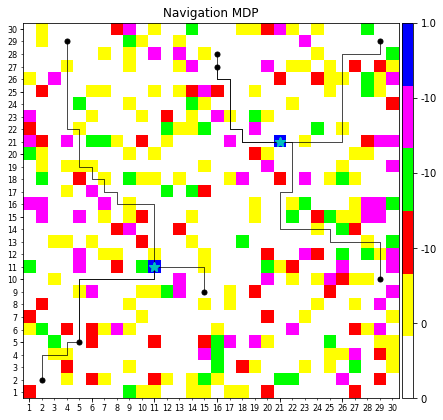

In [7]:
N_tau = 8
state_trajectories, action_trajectories = mdp_multiple_goals.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(2,2)], init_repetition=False)
mdp_multiple_goals.visualize_grid(trajectories=state_trajectories, show_rewards_cbar=True)

In [8]:
## Features: Cell Type Ind + Cell Type Dist + Goal Dist
[mdp_multiple_goals.feature_at_state(s,
                        feature_type="indicator",
                        incl_distance_features=True,
                        incl_goal_ind_feature=False,
                        incl_goal_dist_feature=True,
                        normalize_distance=False,
                        dtype=np.float) for s in state_trajectories[0]]

[array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4., 10., 18.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,  9., 17.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  8., 16.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  7., 15.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  6., 14.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  5., 13.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  4., 12.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  3.,  3., 11.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4.,  3., 10.]),
 array([1., 0., 0., 0., 0., 0., 1., 3., 5., 2., 9.]),
 array([0., 1., 0., 0., 0., 1., 0., 4., 6., 1., 8.]),
 array([1., 0., 0., 0., 0., 0., 1., 4., 5., 1., 7.]),
 array([1., 0., 0., 0., 0., 0., 2., 3., 5., 1., 6.]),
 array([1., 0., 0., 0., 0., 0., 2., 2., 4., 2., 5.]),
 array([1., 0., 0., 0., 0., 0., 2., 1., 3., 3., 4.]),
 array([1., 0., 0., 0., 0., 0., 2., 2., 2., 4., 3.]),
 array([1., 0., 0., 0., 0., 0., 1., 3

**2. All goals have different features (i.e., uniquely identifiable in feature space)**

In [9]:
np.random.seed(0)
mdp_multiple_goals = NavigationMDP(width=30, 
                        height=30, 
                        goal_locs=[(21,21), (11,11)],
                        init_loc=(1,1),
                        rand_init=True,
                        cell_types=['white', 'yellow', 'red', 'lime', 'magenta'],
                        cell_type_rewards=[0, 0, -10, -10, -10],
                        cell_distribution="probability",
                        goal_rewards=[1., 1.5],
                        goal_colors=["orange", "blue"],
                        slip_prob=0.00,
                        step_cost=0.0,
                        gamma=.95)

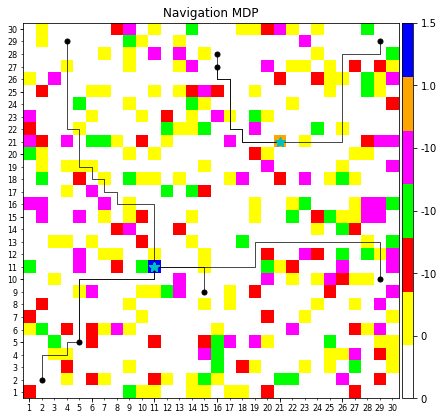

In [10]:
N_tau = 8
state_trajectories, action_trajectories = mdp_multiple_goals.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(2,2)], init_repetition=False)
mdp_multiple_goals.visualize_grid(trajectories=state_trajectories, show_rewards_cbar=True)

In [11]:
## Features: Cell Type Ind + Cell Type Dist + Goal Dist
[mdp_multiple_goals.feature_at_state(s,
                        feature_type="indicator",
                        incl_distance_features=True,
                        incl_goal_ind_feature=False,
                        incl_goal_dist_feature=True,
                        normalize_distance=False,
                        dtype=np.float) for s in state_trajectories[0]]

[array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4., 10., 38., 18.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,  9., 37., 17.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  8., 36., 16.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  7., 35., 15.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  6., 34., 14.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  5., 33., 13.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  4., 32., 12.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  3.,  3., 31., 11.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4.,  3., 30., 10.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  5.,  2., 29.,  9.]),
 array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  4.,  6.,  1., 28.,  8.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  5.,  1., 27.,  7.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  5.,  1., 26.,  6.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4.,  2., 25.,  5.]),
 array([ 1.,  0.,  0

## Custom Grid

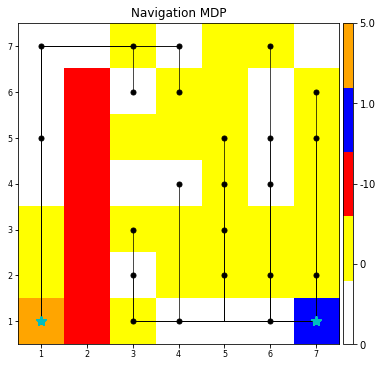

In [12]:
nvmdp = NavigationMDP(width=7, 
                        height=7, 
                        goal_locs=[(7,1),(1,1)],
                        init_loc=(1,1),
                        rand_init=True,
                        cell_types=['white', 'yellow', 'red'],
                        cell_type_rewards=[0, 0, -10],
                        cell_distribution="manual",
                        cell_type_forced_locations=[np.inf, np.inf, [(2,i) for i in range(1,7)]],
                        goal_colors=["blue", "orange"],
                        goal_rewards=[1.,5.],
                        traj_init_cell_types=[0,1],
                        slip_prob=0.00,
                        step_cost=0.0,
                        gamma=.50)

N_tau = 24
state_trajectories, action_trajectories = nvmdp.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(1,1)], init_repetition=False)
nvmdp.visualize_grid(trajectories=state_trajectories, show_rewards_cbar=True)

## Goals can be updated dynamically

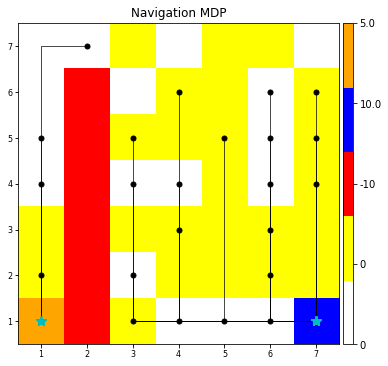

In [13]:
nvmdp.reset_goals([(7,1),(1,1)],[10.,5.],["blue", "orange"])
state_trajectories, action_trajectories = nvmdp.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(1,1)], init_repetition=False)
nvmdp.visualize_grid(trajectories=state_trajectories, show_rewards_cbar=True)

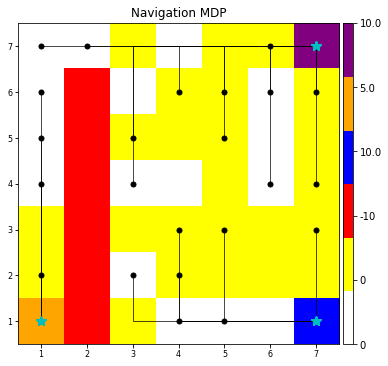

In [14]:
nvmdp.reset_goals([(7,1),(1,1),(7,7)],[10.,5.,10.],["blue", "orange","purple"])
state_trajectories, action_trajectories = nvmdp.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(1,1)], init_repetition=False)
nvmdp.visualize_grid(trajectories=state_trajectories, show_rewards_cbar=True)

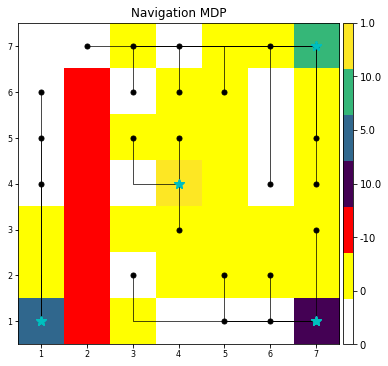

In [15]:
nvmdp.reset_goals([(7,1),(1,1),(7,7),(4,4)],[10.,5.,10.,1.],list(range(4)))
state_trajectories, action_trajectories = nvmdp.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(1,1)], init_repetition=False)
nvmdp.visualize_grid(trajectories=state_trajectories, show_rewards_cbar=True)

## Reference

[1] MacGlashan, James, and Michael L. Littman. "Between Imitation and Intention Learning." IJCAI. 2015.